#### This notebook plots all the branchings ratios of HNLs up to 4 GeV for single flavor dominance scenarios.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from particle import *
from particle import literals as lp

In [3]:
from hnl_apps import model
from hnl_apps import hnl_tools
from hnl_apps.plot_tools import *
from hnl_apps import exp
from hnl_apps.const import *

In [4]:
def pretty_latex(string):
    return string.replace("_", " ").replace("nu", '\\nu').replace("mu", '\\mu').replace("pi", '\\pi').replace("tau", '\\tau').replace("omega", '\\omega').replace("eta", '\\eta').replace("phi", '\\phi').replace("rho", '\\rho').replace("Kstar", 'K^*')
    

In [6]:
# Compute all the decay rates and branching ratios
M4=np.geomspace(0.01, 4, 200)
USQR = 1e-4
hnl_example = model.hnl_model(m4=0.1, mixings={"Ue4SQR": 0.0,"Umu4SQR": 0.0,"Utau4SQR": USQR})
hnl_example.set_high_level_variables()
hnl_example.compute_rates()

list_of_channels = np.array(list(hnl_example.rates.keys()))
all_brs = np.empty((len(list_of_channels), len(M4)))
all_rates = np.empty((len(list_of_channels), len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Ue4SQR": 0.0,"Umu4SQR": 0.0,"Utau4SQR": USQR})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for i,channel in enumerate(list_of_channels):
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
            all_rates[i,j] = my_hnl.rates[channel]
        else:
            all_brs[i,j] = 0.0            
            all_rates[i,j] = 0.0

/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/3030277091.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  all_brs[i,j] = my_hnl.brs[channel]
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/3030277091.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  all_rates[i,j] = my_hnl.rates[channel]


/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/2861575268.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  all_brs[i,j] = my_hnl.brs[channel]
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/2861575268.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  all_rates[i,j] = my_hnl.rates[channel]


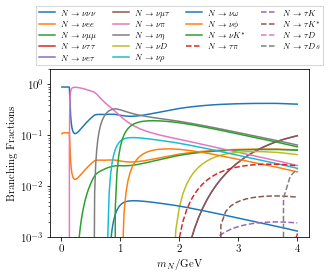

In [7]:
# Compute all the decay rates and branching ratios
M4=np.geomspace(0.01, 4, 200)
USQR = 1e-4
hnl_example = model.hnl_model(m4=0.1, mixings={"Ue4SQR": 0.0,"Umu4SQR": 0.0,"Utau4SQR": USQR})
hnl_example.set_high_level_variables()
hnl_example.compute_rates()

list_of_channels = np.array(list(hnl_example.rates.keys()))
all_brs = np.empty((len(list_of_channels), len(M4)))
all_rates = np.empty((len(list_of_channels), len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Ue4SQR": 0.0,"Umu4SQR": 0.0,"Utau4SQR": USQR})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for i,channel in enumerate(list_of_channels):
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
            all_rates[i,j] = my_hnl.rates[channel]
        else:
            all_brs[i,j] = 0.0            
            all_rates[i,j] = 0.0
            
fig = plt.figure()
ax = fig.add_axes(axes_form)

mask_nonzero_BR = (np.sum(all_brs,axis=1)>0.0)

for i,channel in enumerate(list_of_channels[mask_nonzero_BR]):
    label=pretty_latex(f'$N\\to {channel}$')
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[mask_nonzero_BR][i,:], label=label, linestyle=s)
    # ax.plot(M4, all_rates[mask_nonzero_BR][i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-3,2)
ax.legend(loc='center', bbox_to_anchor=(0.5, 1.2),fancybox=False, shadow=False, ncol=4, fontsize=8)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_tau-only.png", dpi=400)

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:153: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/669138086.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  all_brs[i,j] = my_hnl.brs[channel]
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/669138086.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  all_rates[i,j] = my_hnl.rates[channel]


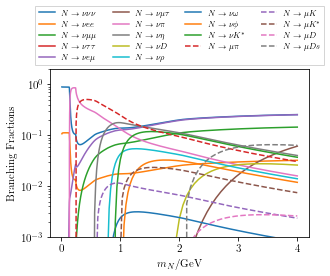

In [8]:
# Compute all the decay rates and branching ratios
M4=np.geomspace(0.01, 4, 200)
USQR = 1e-4
hnl_example = model.hnl_model(m4=0.1, mixings={"Ue4SQR": 0.0,"Umu4SQR": USQR,"Utau4SQR": 0})
hnl_example.set_high_level_variables()
hnl_example.compute_rates()

list_of_channels = np.array(list(hnl_example.rates.keys()))
all_brs = np.empty((len(list_of_channels), len(M4)))
all_rates = np.empty((len(list_of_channels), len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Ue4SQR": 0.0,"Umu4SQR": USQR,"Utau4SQR": 0})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for i,channel in enumerate(list_of_channels):
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
            all_rates[i,j] = my_hnl.rates[channel]
        else:
            all_brs[i,j] = 0.0            
            all_rates[i,j] = 0.0
            
fig = plt.figure()
ax = fig.add_axes(axes_form)

mask_nonzero_BR = (np.sum(all_brs,axis=1)>0.0)

for i,channel in enumerate(list_of_channels[mask_nonzero_BR]):
    label=pretty_latex(f'$N\\to {channel}$')
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[mask_nonzero_BR][i,:], label=label, linestyle=s)
    # ax.plot(M4, all_rates[mask_nonzero_BR][i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-3,2)
ax.legend(loc='center', bbox_to_anchor=(0.5, 1.2),fancybox=False, shadow=False, ncol=4, fontsize=8)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_mu-only.png", dpi=400)

/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:151: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_s
/Users/matheushostert/Repos/stdHNL/hnl_apps/const.py:153: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/G*invGeV_to_cm
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/1156174714.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
  all_brs[i,j] = my_hnl.brs[channel]
/var/folders/my/7j7cn6f92_z66yvbb11lgt2r0000gn/T/ipykernel_6271/1156174714.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
  all_rates[i,j] = my_hnl.rates[channel]


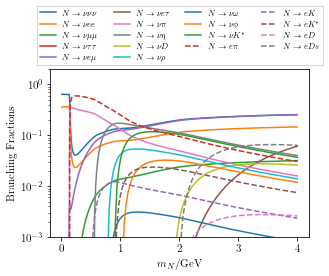

In [9]:
# Compute all the decay rates and branching ratios
M4=np.geomspace(0.01, 4, 200)
USQR = 1e-4
hnl_example = model.hnl_model(m4=0.1, mixings={"Ue4SQR": USQR,"Umu4SQR": 0.0,"Utau4SQR": 0})
hnl_example.set_high_level_variables()
hnl_example.compute_rates()

list_of_channels = np.array(list(hnl_example.rates.keys()))
all_brs = np.empty((len(list_of_channels), len(M4)))
all_rates = np.empty((len(list_of_channels), len(M4)))

for j in range(len(M4)):
    my_hnl = model.hnl_model(m4=M4[j], mixings={"Ue4SQR": USQR,"Umu4SQR": 0.0,"Utau4SQR": 0})
    my_hnl.set_high_level_variables()
    my_hnl.compute_rates()
    for i,channel in enumerate(list_of_channels):
        if channel in my_hnl.brs:
            all_brs[i,j] = my_hnl.brs[channel]
            all_rates[i,j] = my_hnl.rates[channel]
        else:
            all_brs[i,j] = 0.0            
            all_rates[i,j] = 0.0
            
fig = plt.figure()
ax = fig.add_axes(axes_form)

mask_nonzero_BR = (np.sum(all_brs,axis=1)>0.0)

for i,channel in enumerate(list_of_channels[mask_nonzero_BR]):
    label=pretty_latex(f'$N\\to {channel}$')
    if channel[:2] != "nu":
        s='--'
    else:
        s='-'
    
    ax.plot(M4, all_brs[mask_nonzero_BR][i,:], label=label, linestyle=s)
    # ax.plot(M4, all_rates[mask_nonzero_BR][i,:], label=label, linestyle=s)
            
ax.set_xlabel(r"$m_N$/GeV")
ax.set_ylabel(r"Branching Fractions")
ax.set_yscale('log')
ax.set_ylim(1e-3,2)
ax.legend(loc='center', bbox_to_anchor=(0.5, 1.2),fancybox=False, shadow=False, ncol=4, fontsize=8)
ax.patch.set_facecolor('None')
fig.savefig("plots/Branching_ratios_e-only.png", dpi=400)